In [318]:
#Importem totes les llibreries necessaries per dur a terme el projecte.
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [319]:
#Importem el dataset que analitzarem en aquesta pràctica
btc = pd.read_csv('BitCoin.csv',decimal='.')
btc.head(12)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0
5,2/22/2010,0.0,2098150.0,0.0,0.0,0.0,0.000384,0,1.0,0.0,...,65.214056,0.0,262,261,42361,261,261,32350.00,19551.0,0.0
6,2/23/2010,0.0,2110700.0,0.0,0.0,0.0,0.000216,0,1.0,0.0,...,25100.000000,0.0,252,252,42613,252,252,12600.00,50.0,0.0
7,2/24/2010,0.0,2120200.0,0.0,0.0,0.0,0.000282,0,1.0,0.0,...,179.245283,0.0,195,196,42809,196,196,14800.00,5300.0,0.0
8,2/25/2010,0.0,2127600.0,0.0,0.0,0.0,0.000227,0,1.0,0.0,...,1057.142857,0.0,150,150,42959,150,150,8100.00,700.0,0.0
9,2/26/2010,0.0,2136100.0,0.0,0.0,0.0,0.000319,0,1.0,0.0,...,64.582059,0.0,176,176,43135,176,176,29349.00,13162.0,0.0


In [320]:
#Mirem el número de linies del dataset.
len(btc)

2906

# Pregunta 3

Duem a terme la neteja de les dades, com que Bitcoin és un actiu tan volatil que es pot escapar a les normes de la lògica i també als criteris d enormalització hem decidit no aplicar cap criteri d'elimnació d'outliers per si estavem eliminant informació rellevant per l'estudi.

In [321]:
#Veiem tota la info del nostre data set, veiem que hi han files que no coincideixen el número de non-null dades 
#no coincideix amb la len del dataset.
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [322]:
#contem el número de valors nulls a cada fila
btc.isnull().sum(axis = 0)

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [323]:
#Eliminem els valors nulls de cada fila. Veiem que la nova len es menor, per tant ha eliminat les columnes nules.
btc = btc.dropna(how='any',axis=0)
btc=btc.reset_index(drop=True)
len(btc)

2791

In [324]:
#També hem vist que la data está en format string i parialment separada per "/" o "-", la estandaritzem per
#transformar-la a continuació.
for i,j in enumerate(btc['Date']):
    btc.loc[i,'Date'] = j.replace('-','/')


In [325]:
#Fem la transformació
btc['Date'] = btc['Date'].astype('datetime64[ns]')

In [326]:
#Copmprovem
print(btc.loc[1,'Date'])
btc.head()

2010-02-18 00:00:00


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


# Preguntes 4 i 5

Com hem explicat en l’apartat número 1 existeix un període cíclic cada 4 anys que divideix en 2 la recompensa de mineria de Bitcoin anomenat halving, fins ara es diu que els comportaments d’aquests han sigut semblants i aquesta premissa serà la que voldrem analitzar analíticament a través de Python.

Estudiarem les dades del nostre data set en forma descendent, primer estudiarem el periode de temps complert d'aquest, després separarem entre els 2 halvings i per últim tornarem a separar en 4 conjunts, pre i post primer i segon halving, fent un últim estudi de les dades post halving ja que tenen una major rellevància degut a que es un hi ha una major volatilitat i és on aquest actiu ha estat més present en els mitjan i xarxes de comunicació.


In [299]:
#Definim els períodes de temps especificats, escollim un dia random per separar el post perimer i pre segon halving
halving1 = '2012-11-28'
halving2 = '2016-07-09'
pre_1st_halv = pd.date_range(min(btc['Date']), halving1)
post_1st_halv = pd.date_range(halving1,'2015-04-09')
pre_2nd_halv = pd.date_range('2015-04-10',halving2)
post_2nd_halv = pd.date_range(halving2,max(btc['Date']))


In [300]:
#Afegim columnes per identificarlos de forma sencilla i eficient
for i,j in enumerate(btc['Date']):
    if j in pre_1st_halv:
        btc.loc[i,'Time_period'] = 'Pre 1st Halving'
        btc.loc[i,'Pre/Post Halving'] = 'Pre Halving'
    elif j in post_1st_halv:
        btc.loc[i,'Time_period'] = 'Post 1st Halving'
        btc.loc[i,'Pre/Post Halving'] = 'Post Halving'
    elif j in pre_2nd_halv:
        btc.loc[i,'Time_period'] = 'Pre 2nd Halving'
        btc.loc[i,'Pre/Post Halving'] = 'Pre Halving'
    else:
        btc.loc[i,'Time_period'] = 'Post 2nd Halving'
        btc.loc[i,'Pre/Post Halving'] = 'Post Halving'

In [301]:
#distribució dels valors estudiats
btc['Time_period'].value_counts()

Pre 1st Halving     954
Post 1st Halving    848
Post 2nd Halving    539
Pre 2nd Halving     450
Name: Time_period, dtype: int64

## Dades generals

En primer lloc hem decidit donar una visió general de les dades estudiades especificant el període temporal en el que es compren cada valor a través de diferents colors, aquestes primeres representacions pretenen donar a entendre la volatilitat de l'actiu en cada fase i perque hem decidit no excloure cap valor tot i que pugui ser aparentment disparatat ja que es un actiu molt jove i amb una gran volatilitat.

També hem decidit aplicar diferents regressions en aquesta part de l'analisis ja que tot i ser volátil i ser l'actiu que més rápid ha crescut en la historia de la humanitat creiem que podem extreure alguna relació significativa en les dades.

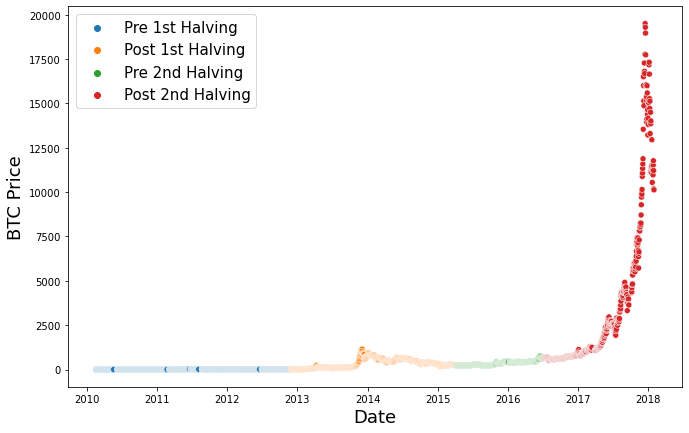

In [302]:
#Fem un primer plot de la gráfica separant els periodes de temps
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc,x='Date',y='btc_market_price',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('BTC Price', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

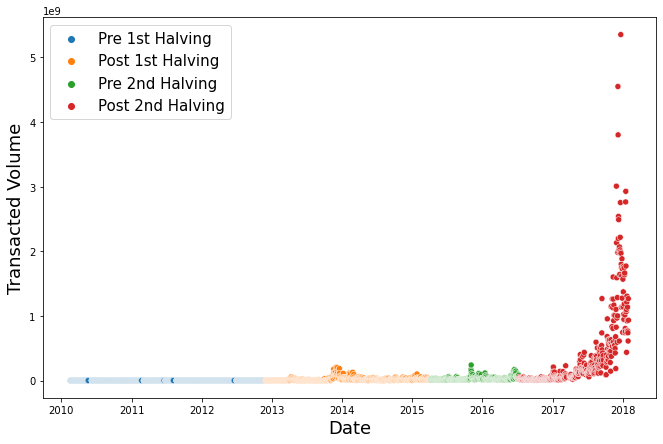

In [303]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc,x='Date',y='btc_trade_volume',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Transacted Volume', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

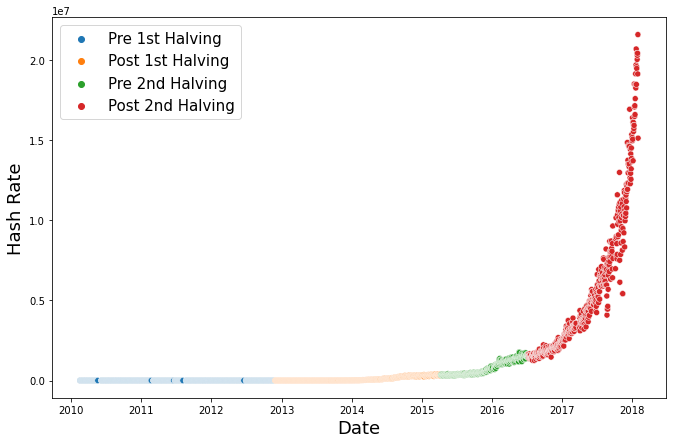

In [304]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc,x='Date',y='btc_hash_rate',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Hash Rate', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

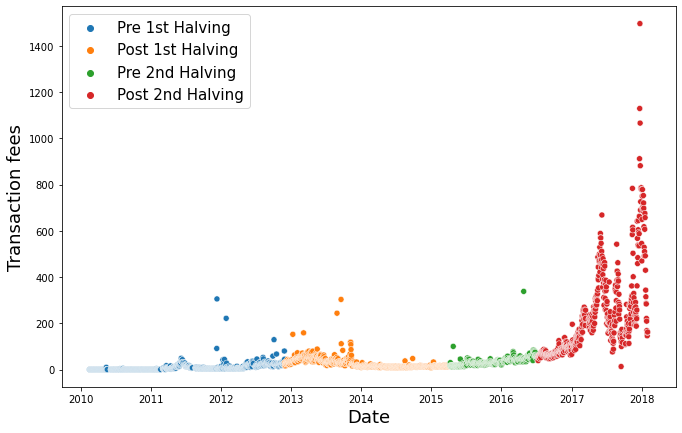

In [305]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc,x='Date',y='btc_transaction_fees',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Transaction fees', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

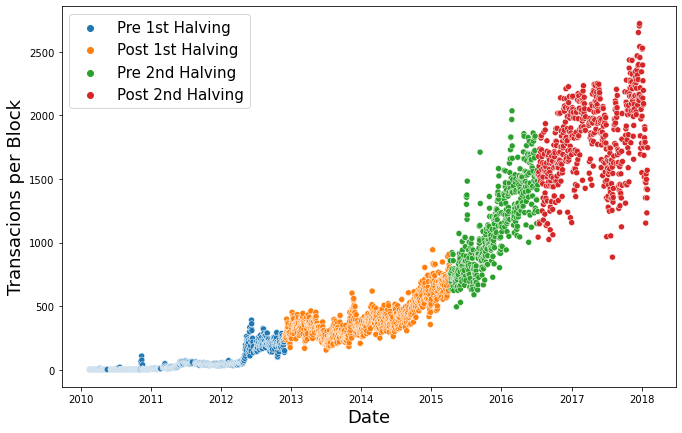

In [306]:
#Fem un primer plot de la gráfica separant els periodes de temps
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc,x='Date',y='btc_n_transactions_per_block',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Transacions per Block', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

### Regressions històriques

#### Price - Miners Revenue Regression

In [307]:
price_val_reg = linear_model.LinearRegression()
X = np.array(btc['btc_miners_revenue']).reshape(-1,1)
y = btc['btc_market_price']
price_val_reg.fit(X, y)

LinearRegression()

In [308]:
print('Coefficient: {:e}'.format(price_val_reg.coef_[0]))
print('Intercept: {:e}'.format(price_val_reg.intercept_))
print('R^2: {:.4f}'.format(price_val_reg.score(X,y)))

Coefficient: 4.004978e-04
Intercept: -4.043347e+01
R^2: 0.9743


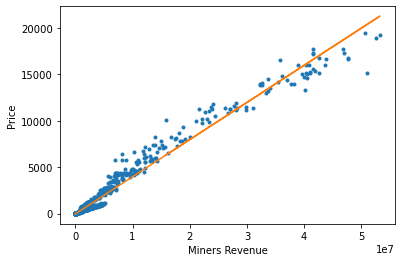

In [309]:
plt.plot(btc['btc_miners_revenue'], btc['btc_market_price'],'.')
plt.plot(btc['btc_miners_revenue'],price_val_reg.predict(X), '-')
plt.xlabel('Miners Revenue')
plt.ylabel('Price')
plt.show()

#### $\log$ (Miners Revenue) - Date

In [310]:
l_rev_date_reg = linear_model.LinearRegression()
btc_log_reg = btc[btc['btc_market_price'] > 0]
btc_log_reg['Date'] = btc_log_reg['Date'].map(datetime.toordinal)
X = np.array(btc_log_reg['Date']).reshape(-1,1)
y = np.log(btc_log_reg['btc_market_price'])
l_rev_date_reg.fit(X, y)

<ipython-input-310-259c01d01f9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_log_reg['Date'] = btc_log_reg['Date'].map(datetime.toordinal)


LinearRegression()

In [311]:
print('Coefficient: {:e}'.format(l_rev_date_reg.coef_[0]))
print('Intercept: {:e}'.format(l_rev_date_reg.intercept_))
print('R^2: {:.4f}'.format(l_rev_date_reg.score(X,y)))

Coefficient: 3.261300e-03
Intercept: -2.393678e+03
R^2: 0.8398


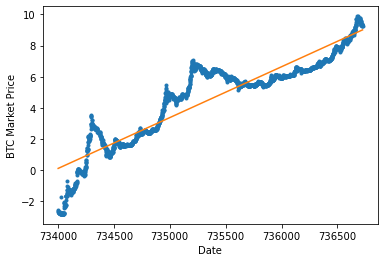

In [314]:
plt.plot(btc_log_reg['Date'],np.log(btc_log_reg['btc_market_price']),'.')
plt.plot(btc_log_reg['Date'],l_rev_date_reg.predict(X), '-')
plt.xlabel('Date')
plt.ylabel('BTC Market Price')
plt.show()

#### Regression $\sqrt{\text{Transactions per block}}$

In [315]:
sq_tx_b_reg = linear_model.LinearRegression()
btc_sqrt_reg = btc
btc_sqrt_reg['Date'] = btc_sqrt_reg['Date'].map(datetime.toordinal)
X = np.array(btc_sqrt_reg['Date']).reshape(-1,1)
y = np.power(btc_sqrt_reg['btc_n_transactions_per_block'],1/2)
sq_tx_b_reg.fit(X, y)

LinearRegression()

In [316]:
print('Coefficient: {:e}'.format(sq_tx_b_reg.coef_[0]))
print('Intercept: {:e}'.format(sq_tx_b_reg.intercept_))
print('R^2: {:.4f}'.format(sq_tx_b_reg.score(X,y)))

Coefficient: 1.677930e-02
Intercept: -1.231581e+04
R^2: 0.9542


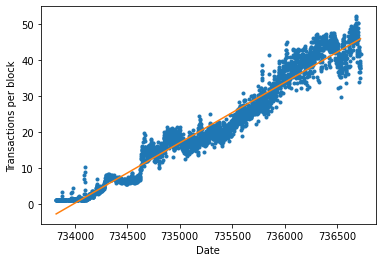

In [317]:
plt.plot(btc_sqrt_reg['Date'],np.power(btc_sqrt_reg['btc_n_transactions_per_block'],1/2),'.')
plt.plot(btc_sqrt_reg['Date'],sq_tx_b_reg.predict(X), '-')
plt.xlabel('Date')
plt.ylabel('Transactions per block')
plt.show()

La regressió lineal del ingressos del miners segons el preu del bitcoin és molt bona. El coeficient R2 = 0,97 ens permet afirmar que la relació entre les dues variables és lineal. 

Per alta banda, per mirar si els ingressos dels miners creixien exponencialment amb el temps hem realitzat una regressió lineal al logaritme dels ingressos dels miners. El resultat de la regressió no és del tot dolenta, però no és satisfactòria. Tenim un coeficient R2 = 0,84 que ens indica que hi ha una certa tendència exponencial en els ingressos dels miners al llarg del temps. Tanmateix l’evolució de la variable no es pot explicar detalladament amb una regressió tant simple. 

Finalment, la última regressió realitzada ha estat per tenir un model que expliqués les transaccions per bloc al llarg del temps. Després de provar diverses relacions funcionals, el creixement parabòlic és el que millor s’ajusta al conjunt de dades. Amb un R2 = 	0,96 podem afirmar que el model que hem creat explica de manera molt acurada les transaccions per bloc al llarg del temps. Aquesta relació es pot anar complint fins arribar al límit potencial del tamany del block de bitcoin, el que siginficará que la xarxa funciona a màxima capacitat i ha hagafat un abast molt gran.

## 1r halving

Continuem amb l'anàlisi separant els dos períodes de halving especificats, en aquest primer hem utilitzats els atributs escollits per tal de representar la situació i poder extreure les millors conclusions possibles. En un primer moment mostrem el preu sense normalitzar pero un cop representat normalitzem tots els atributs escollits.

In [198]:
# Per fer-ho més visual crem un array de dates que comença al '2014-08-17' amb una frequencia de 10 dies.
rng = pd.date_range(min(btc['Date']), '2014-08-17',freq='2D')
#Creem un dataset amb l'array de les dades
df = pd.DataFrame({ 'Date': rng, 'Val' : np.random.randn(len(rng))}) 

In [199]:
#Fem un merge (inner join) del data set original i del nou creat perque contingui un menor numero de dades
df_btc = pd.merge(btc,df,on="Date",how='inner')
df_btc.tail()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Time_period,Pre/Post Halving,Val
780,2014-08-09,588.61,13118850.0,7.721886e+09,3.441904e+06,21334.0,0.208571,1,477.0,7.333333,...,62960,44195505,58049,38287,420310.5818,92209.0,54274894.0,Post 1st Halving,Post Halving,1.198218
781,2014-08-11,578.97,13127875.0,7.600646e+09,8.291907e+06,21412.0,0.236615,2,440.0,6.383333,...,70184,44324175,65330,41319,495304.6170,74547.0,43160222.0,Post 1st Halving,Post Halving,-0.952848
782,2014-08-13,550.14,13136325.0,7.226818e+09,1.795867e+07,21502.0,0.289628,0,388.0,7.616667,...,75011,44478030,69312,42747,717606.6144,124229.0,68343254.0,Post 1st Halving,Post Halving,-0.572317
783,2014-08-15,498.16,13144650.0,6.548139e+09,1.638217e+07,21589.0,0.245926,0,462.0,6.750000,...,69698,44628921,63678,41181,796925.7647,137490.0,68492066.0,Post 1st Halving,Post Halving,-0.153563
784,2014-08-17,491.88,13153050.0,6.469722e+09,1.067010e+07,21679.0,0.219335,1,423.0,7.083333,...,59319,44763579,54894,35259,493900.2813,82438.0,40549429.0,Post 1st Halving,Post Halving,0.704479


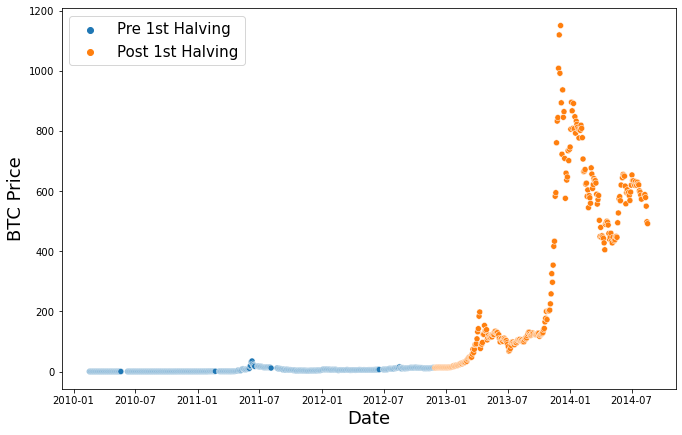

In [200]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = df_btc,x='Date',y='btc_market_price',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('BTC Price', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

In [201]:
#Normalirzem el preu del Bitcoin del nou data set
for i,j in enumerate(df_btc['btc_market_price']):
    df_btc.loc[i,'Normalized_Price'] = (j-df_btc['btc_market_price'].mean())/(max(df_btc['btc_market_price']))

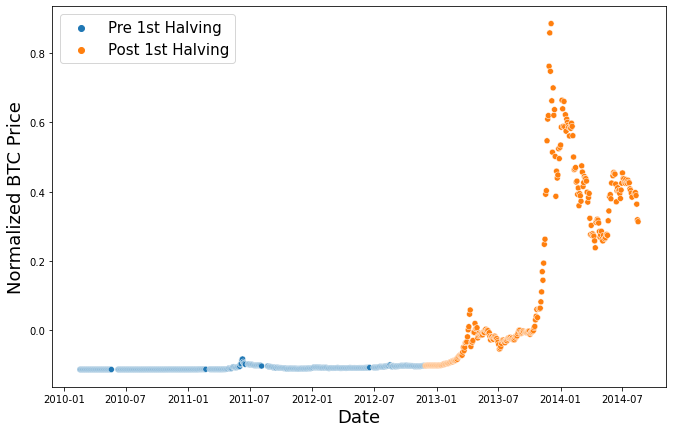

In [202]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = df_btc,x='Date',y='Normalized_Price',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Normalized BTC Price', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

In [203]:
#Normalirzem el volum de Bitcoin transaccionat en el nou data set
for i,j in enumerate(df_btc['btc_trade_volume']):
    df_btc.loc[i,'Normalized_Volume'] = (j-df_btc['btc_trade_volume'].mean())/(max(df_btc['btc_trade_volume']))

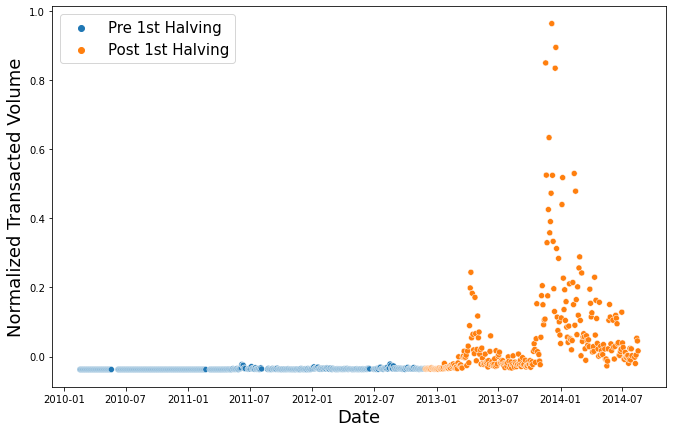

In [204]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = df_btc,x='Date',y='Normalized_Volume',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Normalized Transacted Volume', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

In [205]:
#Normalirzem el has rate de la xarxa Bitcoin transaccionat en el nou data set
for i,j in enumerate(df_btc['btc_hash_rate']):
    df_btc.loc[i,'Normalized_Hash_Rate'] = (j-df_btc['btc_hash_rate'].mean())/(max(df_btc['btc_hash_rate']))

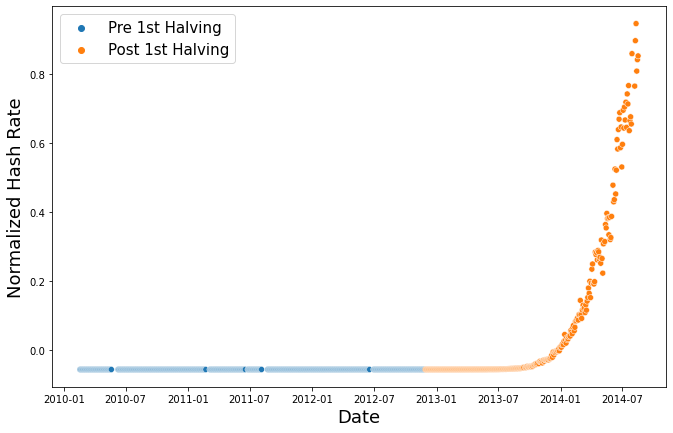

In [206]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = df_btc,x='Date',y='Normalized_Hash_Rate',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Normalized Hash Rate', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

In [207]:
#Normalirzem el volum de Bitcoin transaccionat en el nou data set
for i,j in enumerate(df_btc['btc_transaction_fees']):
    df_btc.loc[i,'Normalized_Trans_Fees'] = (j-df_btc['btc_transaction_fees'].mean())/(max(df_btc['btc_transaction_fees']))

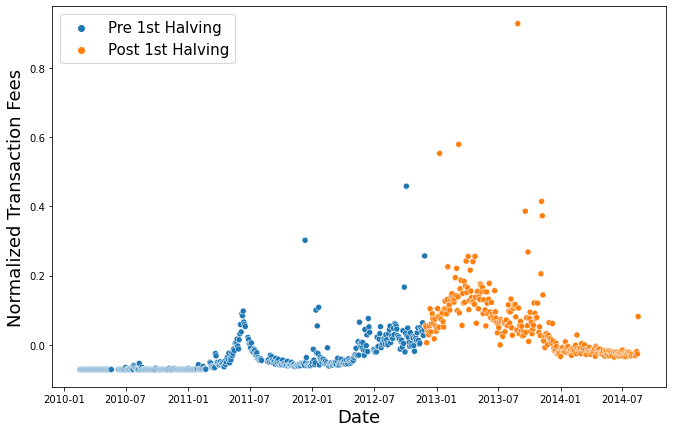

In [208]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = df_btc,x='Date',y='Normalized_Trans_Fees',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Normalized Transaction Fees', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

In [209]:
#Normalirzem el volum de transaccion per bloc de la xarxa Bitcoin en el nou data set
for i,j in enumerate(df_btc['btc_n_transactions_per_block']):
    df_btc.loc[i,'Normalized_Transacions_per_Block'] = (j-df_btc['btc_n_transactions_per_block'].mean())/(max(df_btc['btc_n_transactions_per_block']))

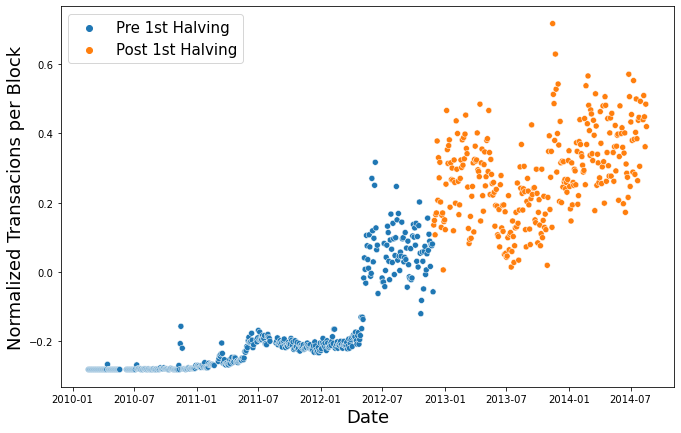

In [210]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = df_btc,x='Date',y='Normalized_Transacions_per_Block',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Normalized Transacions per Block', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

In [211]:
print('BTC Market Price')
print("Mean: {}".format(df_btc['Normalized_Price'].mean()))
print("Standard Deviation: {}".format(df_btc['Normalized_Price'].std()))
print("Variance: {}".format(df_btc['Normalized_Price'].var()))
print("Dieferencia màxima entre valors normalitzats {}".format(max(df_btc['Normalized_Price']) - min(df_btc['Normalized_Price'])))
print("\n")


print('BTC Traded Volume')
print("Mean: {}".format(df_btc['Normalized_Volume'].mean()))
print("Standard Deviation: {}".format(df_btc['Normalized_Volume'].std()))
print("Variance: {}".format(df_btc['Normalized_Volume'].var()))
print("Dieferencia màxima entre valors normalitzats {}".format(max(df_btc['Normalized_Volume']) - min(df_btc['Normalized_Volume'])))
print("\n")

print('BTC Hash Rate')
print("Mean: {}".format(df_btc['Normalized_Hash_Rate'].mean()))
print("Standard Deviation: {}".format(df_btc['Normalized_Hash_Rate'].std()))
print("Variance: {}".format(df_btc['Normalized_Hash_Rate'].var()))
print("Dieferencia màxima entre valors normalitzats {}".format(max(df_btc['Normalized_Hash_Rate']) - min(df_btc['Normalized_Hash_Rate'])))
print("\n")


print('BTC Transaction Fees')
print("Mean: {}".format(df_btc['Normalized_Trans_Fees'].mean()))
print("Standard Deviation: {}".format(df_btc['Normalized_Trans_Fees'].std()))
print("Variance: {}".format(df_btc['Normalized_Trans_Fees'].var()))
print("Dieferencia màxima entre valors normalitzats {}".format(max(df_btc['Normalized_Trans_Fees']) - min(df_btc['Normalized_Trans_Fees'])))
print("\n")



print('Normalized Transacions per Block')
print("Mean: {}".format(df_btc['Normalized_Transacions_per_Block'].mean()))
print("Standard Deviation: {}".format(df_btc['Normalized_Transacions_per_Block'].std()))
print("Variance: {}".format(df_btc['Normalized_Transacions_per_Block'].var()))
print("Dieferencia màxima entre valors normalitzats {}".format(max(df_btc['Normalized_Transacions_per_Block']) - min(df_btc['Normalized_Transacions_per_Block'])))
print("\n")

BTC Market Price
Mean: 9.857649021194065e-17
Standard Deviation: 0.20937831711327223
Variance: 0.04383927967718598
Dieferencia màxima entre valors normalitzats 1.0


BTC Traded Volume
Mean: 2.1258649476301763e-18
Standard Deviation: 0.10303818493159432
Variance: 0.01061686755399743
Dieferencia màxima entre valors normalitzats 1.0


BTC Hash Rate
Mean: -3.747886643639063e-17
Standard Deviation: 0.16389376072916512
Variance: 0.02686116480594882
Dieferencia màxima entre valors normalitzats 0.999999999873949


BTC Transaction Fees
Mean: -6.161030638246291e-17
Standard Deviation: 0.08767146420403038
Variance: 0.007686285635678581
Dieferencia màxima entre valors normalitzats 1.0


Normalized Transacions per Block
Mean: -2.8547581849756414e-16
Standard Deviation: 0.2604369140403062
Variance: 0.06782738619483786
Dieferencia màxima entre valors normalitzats 0.9983388704318936




## 2n Halving

Fem el mateix procediment que amb l'espai temporal assignat al primer Halving.

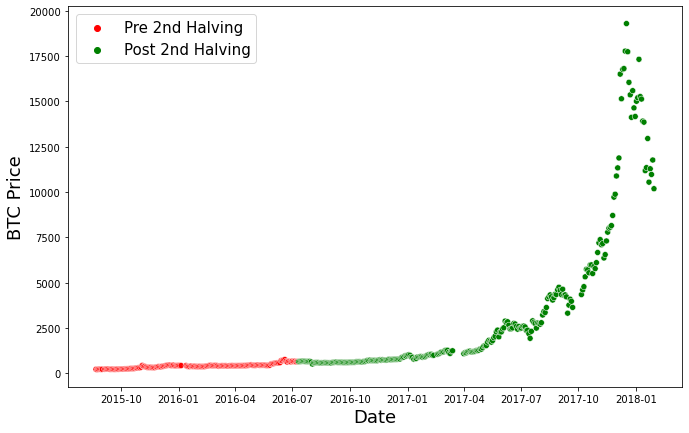

In [212]:
rng_2 = pd.date_range('2015-08-22', max(btc['Date']),freq='2D')
df_2 = pd.DataFrame({ 'Date': rng_2, 'Val' : np.random.randn(len(rng_2))})
df_btc2 = pd.merge(btc,df_2,on="Date",how='inner')
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = df_btc2,x='Date',y='btc_market_price',hue='Time_period', palette=['red','green'])
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('BTC Price', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

In [213]:
for i,j in enumerate(df_btc2['btc_market_price']):
    df_btc2.loc[i,'Normalized_Price'] = (j-df_btc2['btc_market_price'].mean())/(max(df_btc2['btc_market_price']))

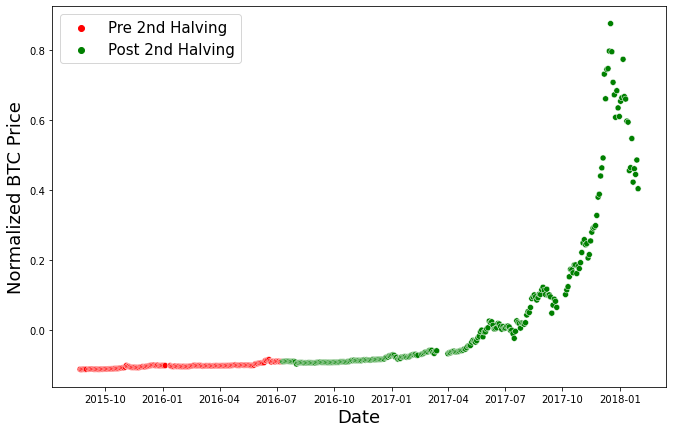

In [214]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = df_btc2,x='Date',y='Normalized_Price',hue='Time_period', palette=['red','green'])
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Normalized BTC Price', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

In [215]:
#Normalirzem el volum de bitcoin transaccionat en el nou data set
for i,j in enumerate(df_btc2['btc_trade_volume']):
    df_btc2.loc[i,'Normalized_Volume'] = (j-df_btc2['btc_trade_volume'].mean())/(max(df_btc2['btc_trade_volume']))

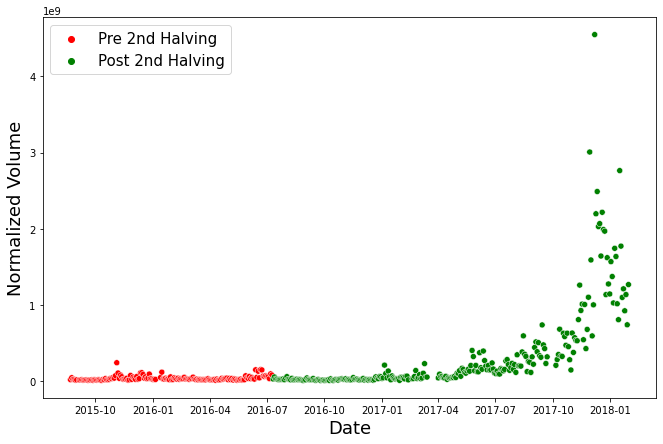

In [216]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = df_btc2,x='Date',y='btc_trade_volume',hue='Time_period', palette=['red','green'])
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Normalized Volume', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

In [217]:
#Normalitzem el hash rate de bitcoin transaccionat en el nou data set
for i,j in enumerate(df_btc2['btc_hash_rate']):
    df_btc2.loc[i,'Normalized_Hash_Rate'] = (j-df_btc2['btc_hash_rate'].mean())/(max(df_btc2['btc_hash_rate']))

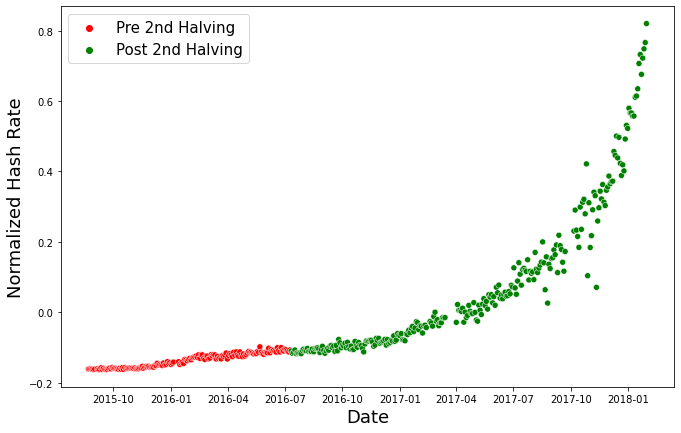

In [218]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = df_btc2,x='Date',y='Normalized_Hash_Rate',hue='Time_period', palette=['red','green'])
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Normalized Hash Rate', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

In [219]:
for i,j in enumerate(df_btc2['btc_transaction_fees']):
    df_btc2.loc[i,'Normalized_Trans_Fees'] = (j-df_btc2['btc_transaction_fees'].mean())/(max(df_btc2['btc_transaction_fees']))

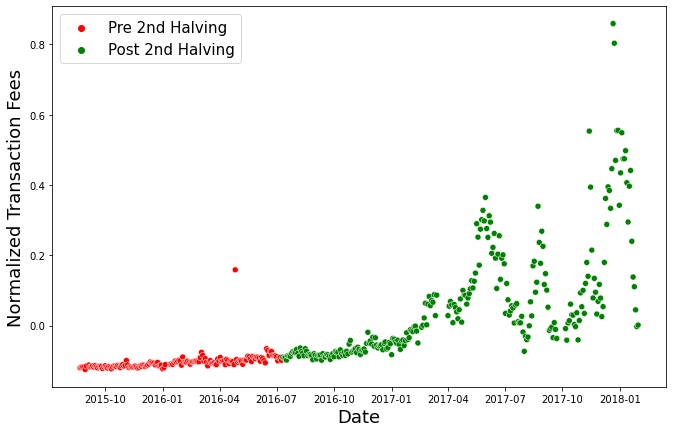

In [220]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = df_btc2,x='Date',y='Normalized_Trans_Fees',hue='Time_period', palette=['red','green'])
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Normalized Transaction Fees', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

In [221]:
for i,j in enumerate(df_btc2['btc_n_transactions_per_block']):
    df_btc2.loc[i,'Normalized_Transacions_per_Block'] = (j-df_btc2['btc_n_transactions_per_block'].mean())/(max(df_btc2['btc_n_transactions_per_block']))

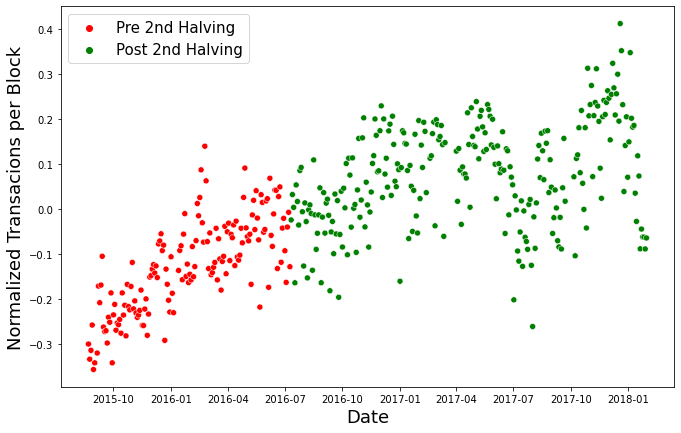

In [222]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = df_btc2,x='Date',y='Normalized_Transacions_per_Block',hue='Time_period', palette=['red','green'])
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Normalized Transacions per Block', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

In [223]:
#Dades finals

print('BTC Market Price')
print("Mean: {}".format(df_btc2['Normalized_Price'].mean()))
print("Standard Deviation: {}".format(df_btc2['Normalized_Price'].std()))
print("Variance: {}".format(df_btc2['Normalized_Price'].var()))
print("Dieferencia màxima entre valors normalitzats {}".format(max(df_btc2['Normalized_Price']) - min(df_btc2['Normalized_Price'])))
print("\n")


print('BTC Traded Volume')
print("Mean: {}".format(df_btc2['Normalized_Volume'].mean()))
print("Standard Deviation: {}".format(df_btc2['Normalized_Volume'].std()))
print("Variance: {}".format(df_btc2['Normalized_Volume'].var()))
print("Dieferencia màxima entre valors normalitzats {}".format(max(df_btc2['Normalized_Volume']) - min(df_btc2['Normalized_Volume'])))
print("\n")

print('BTC Hash Rate')
print("Mean: {}".format(df_btc2['Normalized_Hash_Rate'].mean()))
print("Standard Deviation: {}".format(df_btc2['Normalized_Hash_Rate'].std()))
print("Variance: {}".format(df_btc2['Normalized_Hash_Rate'].var()))
print("Dieferencia màxima entre valors normalitzats {}".format(max(df_btc2['Normalized_Hash_Rate']) - min(df_btc2['Normalized_Hash_Rate'])))
print("\n")


print('BTC Transaction Fees')
print("Mean: {}".format(df_btc2['Normalized_Trans_Fees'].mean()))
print("Standard Deviation: {}".format(df_btc2['Normalized_Trans_Fees'].std()))
print("Variance: {}".format(df_btc2['Normalized_Trans_Fees'].var()))
print("Dieferencia màxima entre valors normalitzats {}".format(max(df_btc2['Normalized_Trans_Fees']) - min(df_btc2['Normalized_Trans_Fees'])))
print("\n")



print('Normalized Transacions per Block')
print("Mean: {}".format(df_btc2['Normalized_Transacions_per_Block'].mean()))
print("Standard Deviation: {}".format(df_btc2['Normalized_Transacions_per_Block'].std()))
print("Variance: {}".format(df_btc2['Normalized_Transacions_per_Block'].var()))
print("Dieferencia màxima entre valors normalitzats {}".format(max(df_btc2['Normalized_Transacions_per_Block']) - min(df_btc2['Normalized_Transacions_per_Block'])))
print("\n")

BTC Market Price
Mean: -4.056084118068488e-17
Standard Deviation: 0.19667277208969686
Variance: 0.03868017928144585
Dieferencia màxima entre valors normalitzats 0.9889454444411899


BTC Traded Volume
Mean: -2.01504178942505e-18
Standard Deviation: 0.10729191102821006
Variance: 0.011511554172085343
Dieferencia màxima entre valors normalitzats 0.9985653249610459


BTC Hash Rate
Mean: 1.0946227010941239e-16
Standard Deviation: 0.19819181667619876
Variance: 0.03927999619741198
Dieferencia màxima entre valors normalitzats 0.9821808319684511


BTC Transaction Fees
Mean: 8.023248423302215e-17
Standard Deviation: 0.1548659666779518
Variance: 0.023983467635096473
Dieferencia màxima entre valors normalitzats 0.98439490680969


Normalized Transacions per Block
Mean: -2.734281705553701e-16
Standard Deviation: 0.14788617204850946
Variance: 0.02187031988316134
Dieferencia màxima entre valors normalitzats 0.7681592722962829




# Desglosem l'espai temporal en 4 datasets

In [236]:
# Definim els dataframes dels 4 períodes concrets
btc_pre1 = btc[btc['Time_period'] == 'Pre 1st Halving']
btc_post1 = btc[btc['Time_period'] == 'Post 1st Halving']
btc_pre2= btc[btc['Time_period'] == 'Pre 2nd Halving']
btc_post2 = btc[btc['Time_period'] == 'Post 2nd Halving']

### Post 1st Halving vs Post 2nd Halving

Com que son els dos moments més interessants i més actius del nostre cas d'estudi hem decidit comparar diferents atributs dels períodes post halving

[(15673.0, 16534.0)]

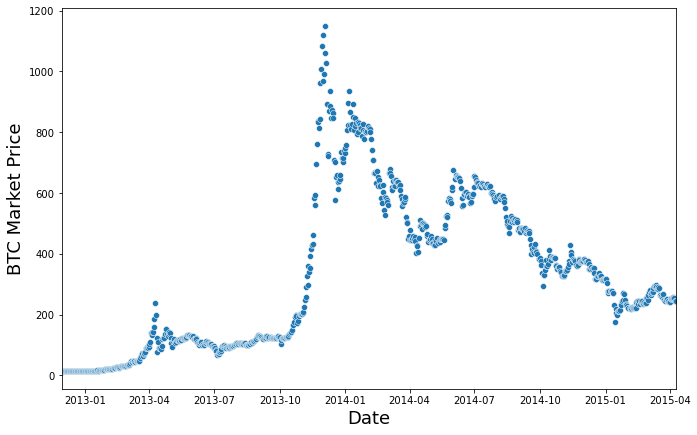

In [225]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc_post1,x='Date',y='btc_market_price')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel('BTC Market Price', fontsize = 18)
scatter.set(xlim=(min(btc_post1['Date']),max(btc_post1['Date'])))

[(16992.0, 17562.0)]

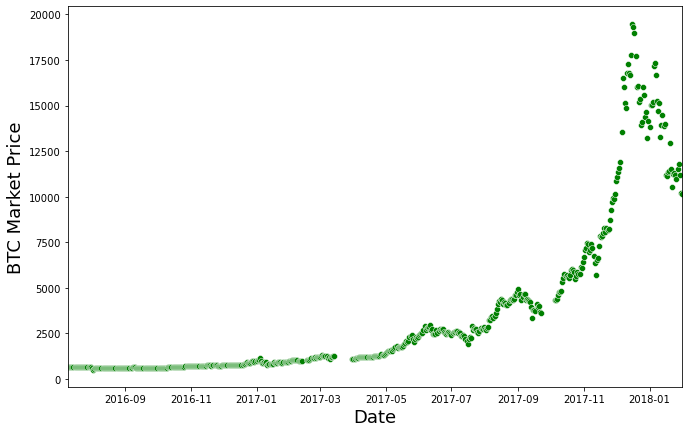

In [249]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc_post2,x='Date',y='btc_market_price', color='green')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel('BTC Market Price', fontsize = 18)
scatter.set(xlim=(min(btc_post2['Date']),max(btc_post2['Date'])))

Text(0, 0.5, 'Trade Volume')

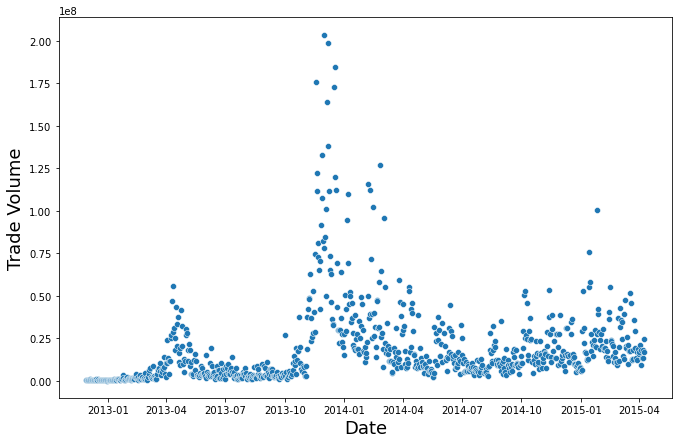

In [240]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc_post1,x='Date',y='btc_trade_volume')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Trade Volume', fontsize = 18)

Text(0, 0.5, 'Trade Volume')

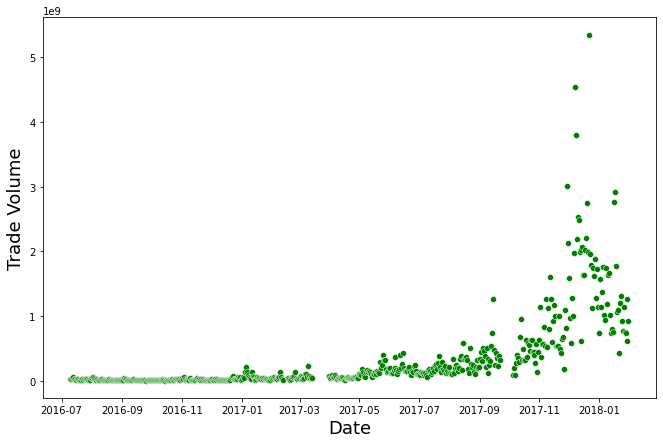

In [250]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc_post2,x='Date',y='btc_trade_volume', color='green')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('Trade Volume', fontsize = 18)

[(15673.0, 16534.0)]

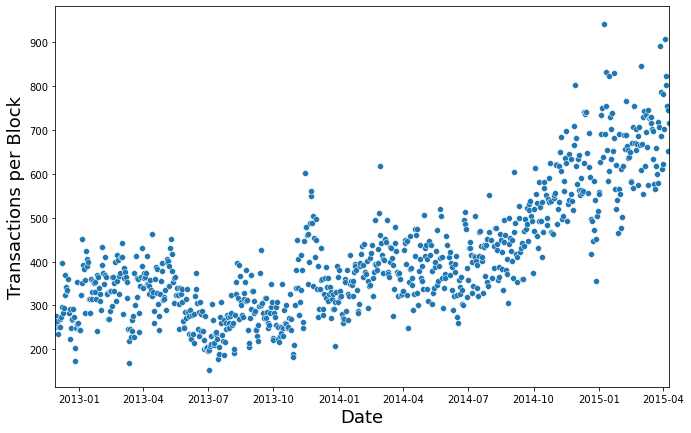

In [226]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc_post1,x='Date',y='btc_n_transactions_per_block')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel('Transactions per Block', fontsize = 18)
scatter.set(xlim=(min(btc_post1['Date']),max(btc_post1['Date'])))

[(16992.0, 17562.0)]

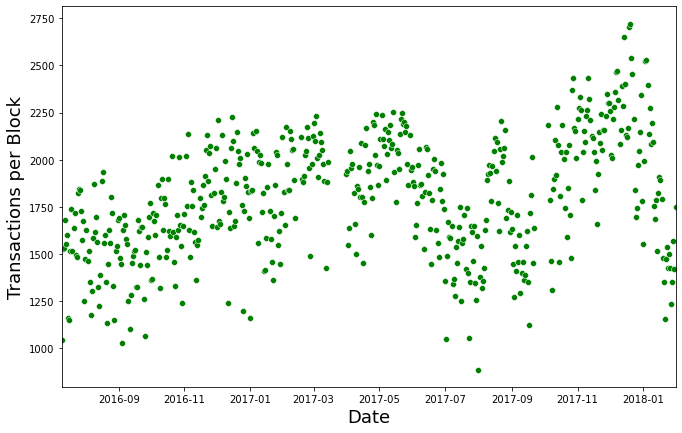

In [251]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc_post2,x='Date',y='btc_n_transactions_per_block', color='green')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel('Transactions per Block', fontsize = 18)
scatter.set(xlim=(min(btc_post2['Date']),max(btc_post2['Date'])))

Text(0, 0.5, 'Price')

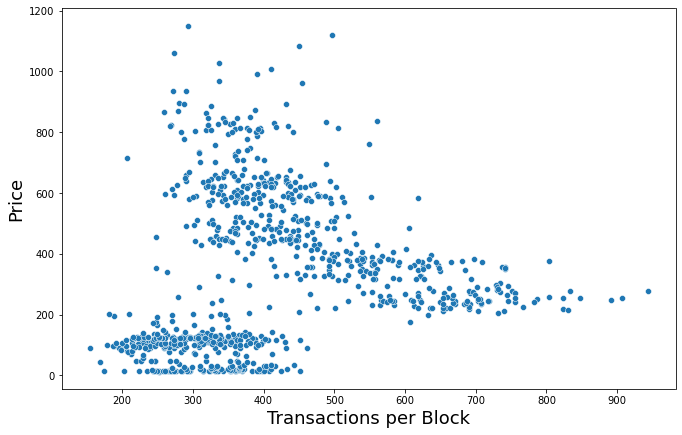

In [253]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc_post1,x='btc_n_transactions_per_block',y='btc_market_price')
scatter.set_xlabel('Transactions per Block', fontsize = 18)
scatter.set_ylabel ('Price', fontsize = 18)

Text(0, 0.5, 'Price')

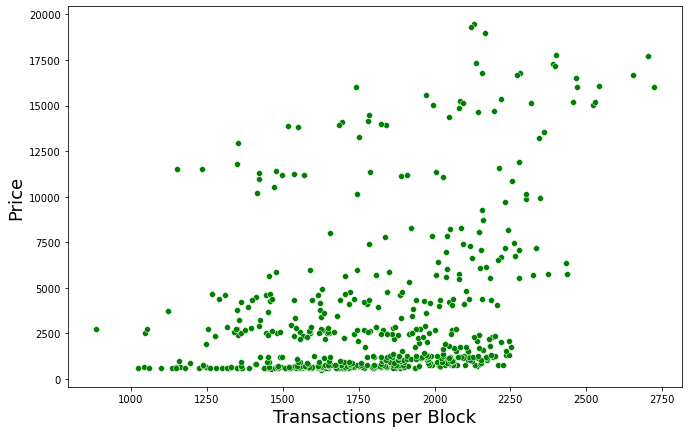

In [254]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc_post2,x='btc_n_transactions_per_block',y='btc_market_price', color='green')
scatter.set_xlabel('Transactions per Block', fontsize = 18)
scatter.set_ylabel ('Price', fontsize = 18)

Text(0, 0.5, 'Price')

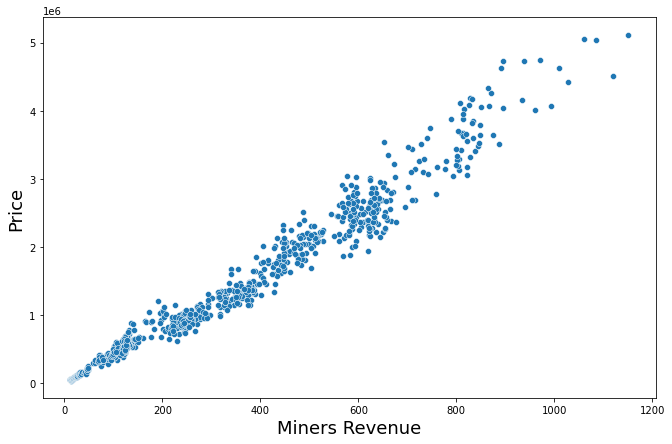

In [244]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc_post1,x='btc_market_price',y='btc_miners_revenue')
scatter.set_xlabel('Miners Revenue', fontsize = 18)
scatter.set_ylabel ('Price', fontsize = 18)

Text(0, 0.5, 'Price')

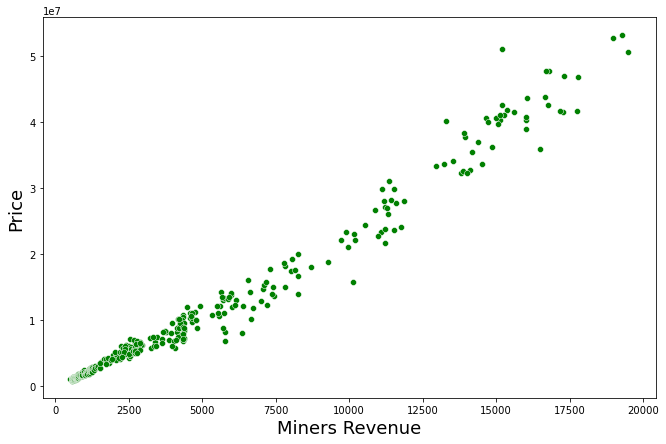

In [255]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.scatterplot(data = btc_post2,x='btc_market_price',y='btc_miners_revenue', color='green')
scatter.set_xlabel('Miners Revenue', fontsize = 18)
scatter.set_ylabel ('Price', fontsize = 18)

### Post 1st Halving vs Post 2nd Halving

Com que al final el preu és l'atribut que més impacta en el mercat ens ha semblat interessant representar en una mateixa gràfica l'evolució dels preus dels 2 períodes post halving. Veiem que la similitud que presenten és molt gran

In [173]:
btc_post1_comp = btc_post1
btc_post1_comp['Date'] = btc_post1_comp['Date'].map(datetime.toordinal)
btc_post1_comp['Date'] = btc_post1_comp['Date'] / min(btc_post1_comp['Date'])

btc_post2_comp = btc_post2
btc_post2_comp['Date'] = btc_post2_comp['Date'].map(datetime.toordinal)
btc_post2_comp['Date'] = btc_post2_comp['Date'] / min(btc_post2_comp['Date'])

In [174]:
mean_p1 = btc_post1_comp['btc_market_price'].mean()
max_p1 = btc_post1_comp['btc_market_price'].max()
min_p1 = btc_post1_comp['btc_market_price'].min()

btc_post1_comp['btc_market_price'] = (btc_post1_comp['btc_market_price']  - mean_p1 ) / (max_p1 - min_p1)

mean_p2 = btc_post2_comp['btc_market_price'].mean()
max_p2 = btc_post2_comp['btc_market_price'].max()
min_p2 = btc_post2_comp['btc_market_price'].min()

btc_post2_comp['btc_market_price'] = ( btc_post2_comp['btc_market_price'] - mean_p2 ) / (max_p2 - min_p2)

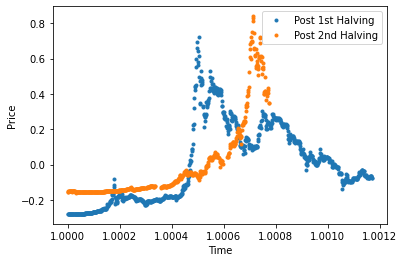

In [175]:
plt.plot(btc_post1_comp['Date'], btc_post1_comp['btc_market_price'],'.', label = "Post 1st Halving")
plt.plot(btc_post2_comp['Date'], btc_post2_comp['btc_market_price'],'.', label = "Post 2nd Halving")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Traded Volume and Price vs Time

Per últim ens ha semblat també interessant representar el preu en contraposició al volum transaccionata la xarxa, ja que com hem vist, aquests dos no sempre están al mateix nivell

In [259]:
btc_nor = btc

In [260]:
mean_t = btc_nor['btc_trade_volume'].mean()
max_t = btc_nor['btc_trade_volume'].max()
min_t = btc_nor['btc_trade_volume'].min()

btc_nor['btc_trade_volume'] = (btc['btc_trade_volume'] - min_t) / (max_t - min_t)

mean_p = btc_nor['btc_market_price'].mean()
max_p = btc_nor['btc_market_price'].max()
min_p = btc_nor['btc_market_price'].min()

btc_nor['btc_market_price'] = (btc['btc_market_price'] - min_p) / (max_p - min_p)

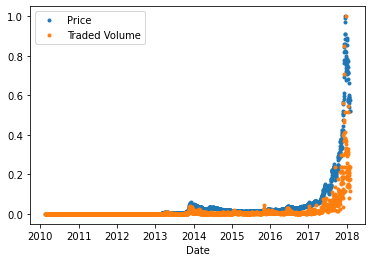

In [261]:
plt.plot(btc_nor['Date'], btc_nor['btc_market_price'],'.', label = "Price")
plt.plot(btc_nor['Date'], btc_nor['btc_trade_volume'],'.', label = "Traded Volume")
plt.xlabel('Date')
plt.ylabel('')
plt.legend()
plt.show()